In [113]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('../data/processed/booking_data.csv')

# Inspecci칩n inicial
df.head()

C:\Users\Alumno_AI\AppData\Local\Temp\ipykernel_11340\1013993835.py:4: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/booking_data.csv')


hotel  cancelado regimen canal_distribucion  \
0                    gran hotel bali          0      bb             direct   
1                    gran hotel bali          0      bb          corporate   
2                    gran hotel bali          0      bb              ta/to   
3  eurostars hotel de la reconquista          0      bb              ta/to   
4                   parador de c치diz          0      bb             direct   

   tipo_cliente  cliente_recurrente  reservas_previas_no_canceladas  adultos  \
0       j칩venes                   0                               0        1   
1       j칩venes                   0                               0        1   
2  tercera edad                   0                               0        2   
3        pareja                   0                               0        2   
4        pareja                   0                               0        2   

   ninos  hombres  ...  ubicaci칩n  \
0      0        1  ...   benidorm   
1      0        1  ...   benidorm   
2      0        1  ...   benidorm   
3      0        1  ...   asturias   
4      0        1  ...      c치diz   

                                campa침a_asignada  lanzamiento_inicio  \
0                                            NaN                 NaN   
1        gran hotel bali campa침a 2023 - 2 verano          2023-05-02   
2  gran hotel bali campa침a 2020 - 1 semana santa          2020-03-08   
3                                            NaN                 NaN   
4                                            NaN                 NaN   

   lanzamiento_fin  fecha_inicio   fecha_fin tiene_campa침a  \
0              NaN           NaN         NaN             0   
1       2023-05-30    2023-06-28  2023-07-25             1   
2       2020-03-18    2020-03-28  2020-04-14             1   
3              NaN           NaN         NaN             0   
4              NaN           NaN         NaN             0   

                                         review_text review_sentiment   a침o  
0  personal amable zona agradable habitacion ampl...         positive  2022  
1  i spent five nights and six days at this estab...         positive  2023  
2  this was our 2nd time staying at this hotel we...         positive  2020  
3  we booked a standard room six months before wi...         negative  2021  
4  the savoy is an excellent hotel on ocean drive...         positive  2024  

[5 rows x 32 columns]

In [109]:
df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'], errors='coerce')
df['semana'] = df['fecha_inicio'].dt.isocalendar().week
df['mes'] = df['fecha_inicio'].dt.month
df['a침o'] = df['fecha_inicio'].dt.year

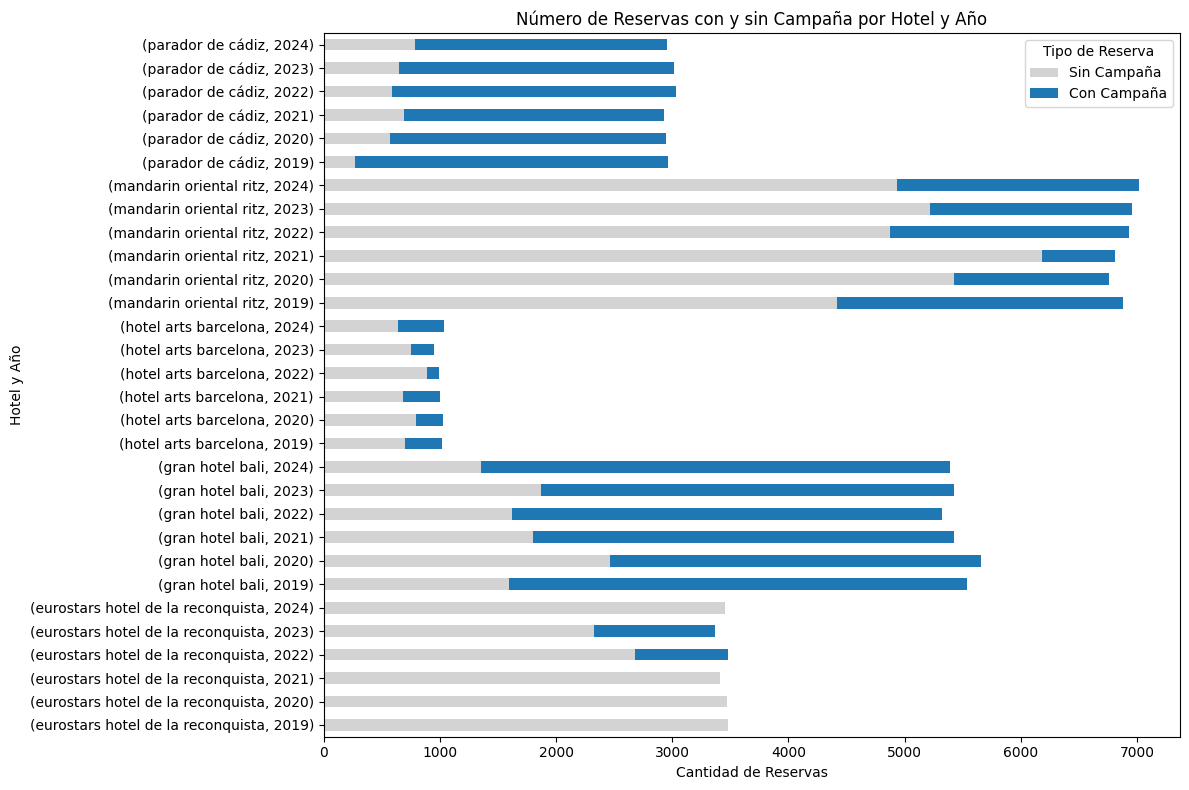

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear columna auxiliar
df['tiene_campa침a'] = df['campa침a_asignada'].notna()

# Agrupar por hotel, a침o y si tiene campa침a
conteo = df.groupby(['hotel', 'a침o', 'tiene_campa침a']).size().reset_index(name='cuenta')

# Pivotar para gr치fico
pivot = conteo.pivot_table(index=['hotel', 'a침o'], columns='tiene_campa침a', values='cuenta', aggfunc='sum', fill_value=0)
# Renombrar solo las columnas que existen
col_map = {}
if False in pivot.columns:
	col_map[False] = 'Sin campa침a'
if True in pivot.columns:
	col_map[True] = 'Con campa침a'
pivot = pivot.rename(columns=col_map)

# Graficar apilado
pivot.plot(kind='barh', stacked=True, figsize=(12, 8), color=['#d3d3d3', '#1f77b4'])

# Personalizar gr치fico
plt.title('N칰mero de Reservas con y sin Campa침a por Hotel y A침o')
plt.xlabel('Cantidad de Reservas')
plt.ylabel('Hotel y A침o')
plt.legend(title='Tipo de Reserva', labels=['Sin Campa침a', 'Con Campa침a'])
plt.tight_layout()
plt.show()


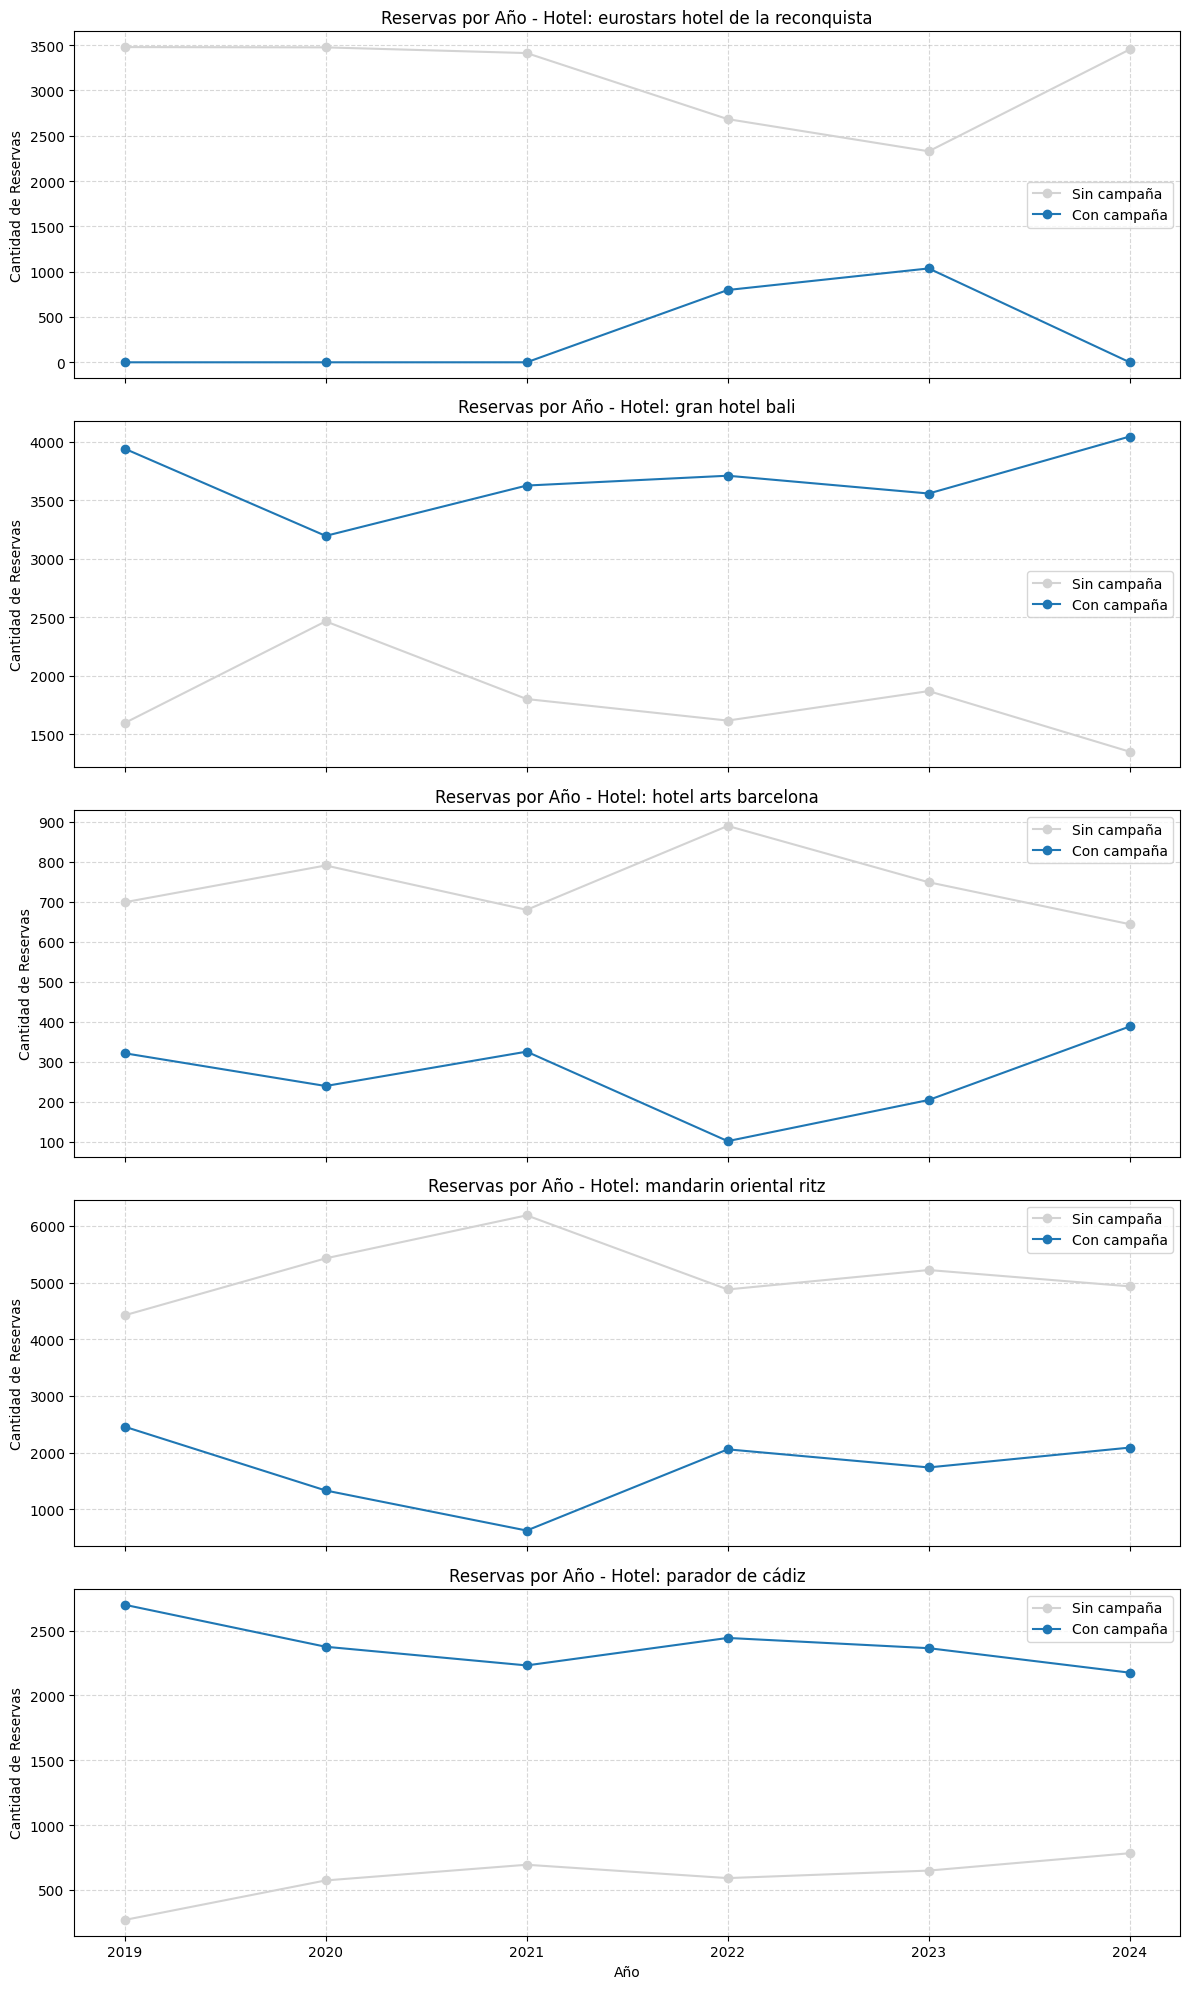

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear columna auxiliar
df['tiene_campa침a'] = df['campa침a_asignada'].notna()

# Agrupar por hotel, a침o y si tiene campa침a
conteo = df.groupby(['hotel', 'a침o', 'tiene_campa침a']).size().reset_index(name='cuenta')

# Pivotar para tener columnas 'Con campa침a' y 'Sin campa침a' por hotel y a침o
pivot = conteo.pivot_table(index=['hotel', 'a침o'], columns='tiene_campa침a', values='cuenta', aggfunc='sum', fill_value=0)
pivot.columns = ['Sin campa침a', 'Con campa침a']

# Obtener lista de hoteles
hoteles = pivot.index.get_level_values(0).unique()

# Crear figura con un subplot por hotel
n_hoteles = len(hoteles)
fig, axes = plt.subplots(n_hoteles, 1, figsize=(12, 4 * n_hoteles), sharex=True)

if n_hoteles == 1:
    axes = [axes]

for ax, hotel in zip(axes, hoteles):
    data_hotel = pivot.loc[hotel]
    ax.plot(data_hotel.index, data_hotel['Sin campa침a'], label='Sin campa침a', marker='o', color='#d3d3d3')
    ax.plot(data_hotel.index, data_hotel['Con campa침a'], label='Con campa침a', marker='o', color='#1f77b4')
    ax.set_title(f'Reservas por A침o - Hotel: {hotel}')
    ax.set_ylabel('Cantidad de Reservas')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend()

plt.xlabel('A침o')
plt.tight_layout()
plt.show()


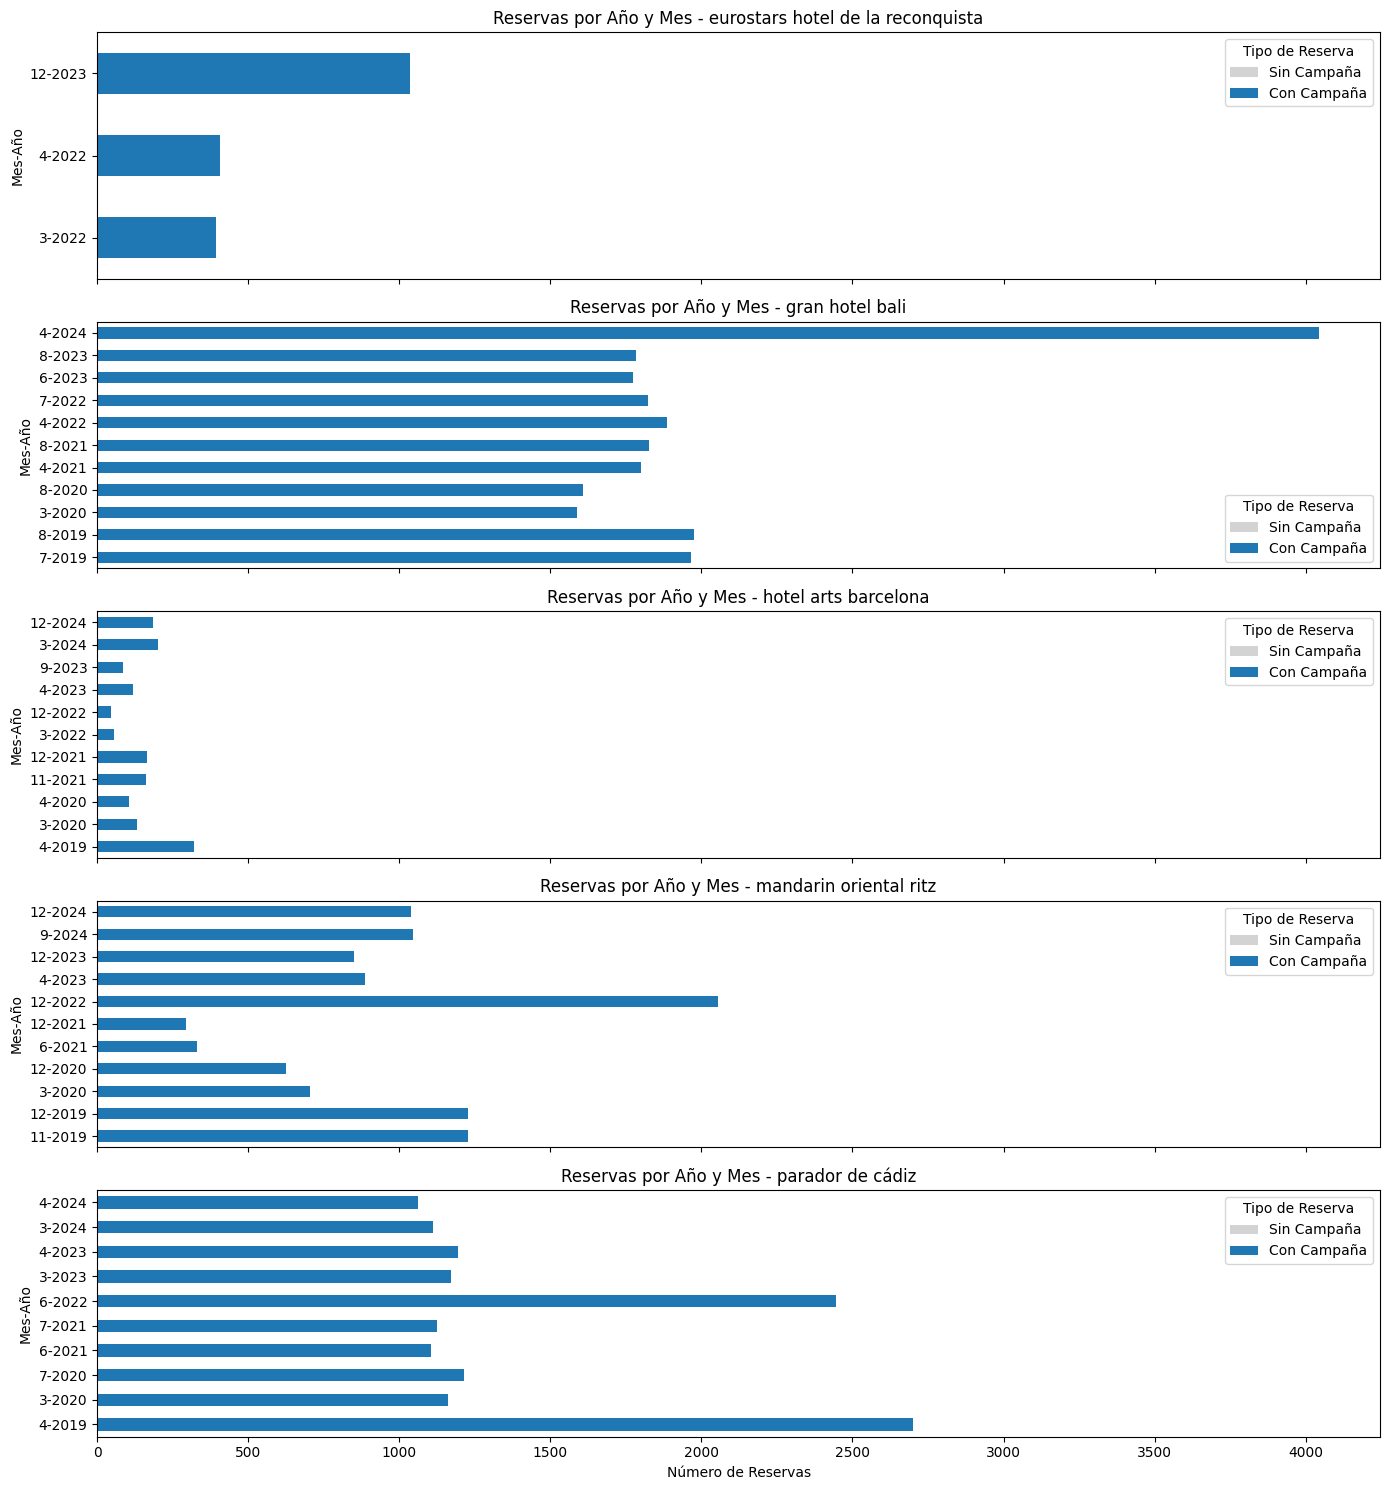

In [102]:
# Asegurar que ambas columnas existen en reservas_pivot
if 'Reservas_Sin_Campa침a' not in reservas_pivot.columns:
	reservas_pivot['Reservas_Sin_Campa침a'] = 0
if 'Reservas_Con_Campa침a' not in reservas_pivot.columns:
	reservas_pivot['Reservas_Con_Campa침a'] = 0

# Crear una figura y un conjunto de subgr치ficos por hotel
hoteles = reservas_pivot.index.get_level_values('hotel').unique()
fig, axes = plt.subplots(nrows=len(hoteles), figsize=(14, 3 * len(hoteles)), sharex=True)

if len(hoteles) == 1:
	axes = [axes]

for i, hotel in enumerate(hoteles):
	data_hotel = reservas_pivot.xs(hotel, level='hotel').copy()
	# Asegurar que ambas columnas existen para cada hotel
	if 'Reservas_Sin_Campa침a' not in data_hotel.columns:
		data_hotel['Reservas_Sin_Campa침a'] = 0
	if 'Reservas_Con_Campa침a' not in data_hotel.columns:
		data_hotel['Reservas_Con_Campa침a'] = 0
	data_hotel[['Reservas_Sin_Campa침a', 'Reservas_Con_Campa침a']].plot(
		kind='barh', stacked=True, ax=axes[i], color=['#d3d3d3', '#1f77b4']
	)
	axes[i].set_title(f'Reservas por A침o y Mes - {hotel}')
	axes[i].set_xlabel('N칰mero de Reservas')
	axes[i].set_ylabel('Mes-A침o')
	axes[i].set_yticklabels([f'{int(mes)}-{int(a침o)}' for a침o, mes in data_hotel.index])
	axes[i].legend(title='Tipo de Reserva', labels=['Sin Campa침a', 'Con Campa침a'])

plt.tight_layout()
plt.show()


## 游늵 Enfoque 1: Modelo de Diferencia en Diferencias (DiD)
Este modelo compara la evoluci칩n de las reservas entre per칤odos con y sin campa침a.

1. Definir grupos:
- Grupo Tratamiento: Per칤odos con campa침a activa.
- Grupo Control: Per칤odos sin campa침a activa.
2. Modelo de Diferencia en Diferencias (DiD) por Hotel



In [86]:
reservas_periodo = df.groupby(['hotel', 'a침o', 'mes', 'tiene_campa침a']).size().reset_index(name='reservas')



In [ ]:
!pip install statsmodels

In [87]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Modelo de regresi칩n
model = ols('reservas ~ C(a침o) + C(mes) + C(tiene_campa침a)', data=reservas_periodo).fit()

# Resultados
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               reservas   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.296
Date:                Fri, 06 Jun 2025   Prob (F-statistic):              0.267
Time:                        10:44:23   Log-Likelihood:                -365.76
No. Observations:                  46   AIC:                             757.5
Df Residuals:                      33   BIC:                             781.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

游늳 Paso 3: Modelos de Series Temporales (ARIMA/SARIMA)
Estos modelos permiten capturar patrones temporales y prever el impacto de las campa침as.

Preparar la serie temporal:

In [88]:
reservas_ts = df.groupby(['hotel', 'fecha_inicio']).size().unstack(fill_value=0)
# Transponer para que las fechas sean el 칤ndice
reservas_ts = reservas_ts.T
reservas_ts.index = pd.to_datetime(reservas_ts.index)
reservas_ts = reservas_ts.resample('D').sum()  # Resampleo diario

Aqu칤, .size() cuenta el n칰mero de reservas por d칤a.
2. Comprobar estacionariedad:

In [89]:
from statsmodels.tsa.stattools import adfuller

# Prueba de ADF para todos los hoteles
for hotel in reservas_ts.columns:
    result = adfuller(reservas_ts[hotel])
    print(f'Hotel: {hotel}')
    print(f'  Estad칤stico ADF: {result[0]}')
    print(f'  p-valor: {result[1]}')
    print('-' * 40)

Hotel: eurostars hotel de la reconquista
  Estad칤stico ADF: -9.39759114906484
  p-valor: 6.312950570975995e-16
----------------------------------------
Hotel: gran hotel bali
  Estad칤stico ADF: -15.906548161056314
  p-valor: 8.214676040497018e-29
----------------------------------------
Hotel: hotel arts barcelona
  Estad칤stico ADF: -42.3511609498551
  p-valor: 0.0
----------------------------------------
Hotel: mandarin oriental ritz
  Estad칤stico ADF: -19.845948045065388
  p-valor: 0.0
----------------------------------------
Hotel: parador de c치diz
  Estad칤stico ADF: -9.13250215815723
  p-valor: 2.9957137404823747e-15
----------------------------------------


Si el p-valor es alto, es necesario diferenciar la serie para hacerla estacionaria.

3.Ajustar el modelo ARIMA/SARIMA:

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Ajustar un modelo SARIMA para cada hotel y guardar los resultados en un diccionario
sarima_results = {}

for hotel in reservas_ts.columns:
    model = SARIMAX(reservas_ts[hotel], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    results = model.fit(disp=False)
    sarima_results[hotel] = results
    print(f"Resumen para {hotel}:")
    print(results.summary())
    print("="*80)


Resumen para eurostars hotel de la reconquista:
                                       SARIMAX Results                                       
Dep. Variable:     eurostars hotel de la reconquista   No. Observations:                 2083
Model:                 SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -9209.095
Date:                               Fri, 06 Jun 2025   AIC                          18428.191
Time:                                       10:15:10   BIC                          18456.379
Sample:                                   04-05-2019   HQIC                         18438.522
                                        - 12-16-2024                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0604      0.022     -2.75

C:\Users\Alumno_AI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1431: RuntimeWarning: divide by zero encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum


Resumen para gran hotel bali:
                                     SARIMAX Results                                     
Dep. Variable:                   gran hotel bali   No. Observations:                 2083
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -13208.092
Date:                           Fri, 06 Jun 2025   AIC                          26426.184
Time:                                   10:15:13   BIC                          26454.373
Sample:                               04-05-2019   HQIC                         26436.515
                                    - 12-16-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0026      0.119     -0.022      0.982      -0.235       0.230
ma.L1        

游댩 Predicci칩n del Impacto de Futuras Campa침as
Una vez ajustado el modelo, puedes prever el n칰mero de reservas para per칤odos futuros y estimar el impacto de campa침as hipot칠ticas.

Previsi칩n futura:

In [53]:
forecast = results.get_forecast(steps=730)  # Previsi칩n para los 2 a침os
forecast_mean = forecast.predicted_mean

Evaluar el impacto de una campa침a:

In [54]:
# Simular una campa침a activa
reservas_con_campa침a = forecast_mean * 1.2  # Supongamos un aumento del 20%

# Comparar con la previsi칩n sin campa침a
impacto = reservas_con_campa침a - forecast_mean
print(f'Impacto estimado de la campa침a: {impacto.sum()} reservas')

Impacto estimado de la campa침a: 519.8546290131108 reservas


游늵 Visualizaci칩n del Impacto
Para facilitar la interpretaci칩n, es 칰til visualizar los resultados:

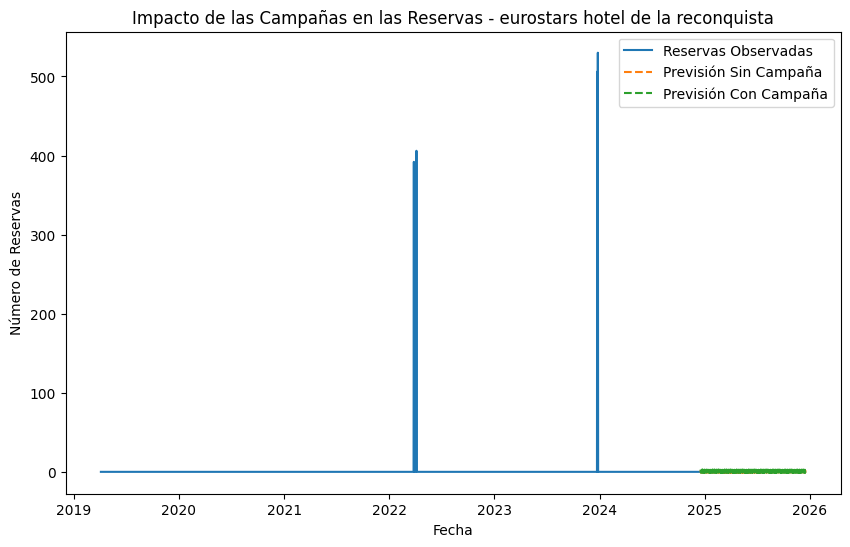

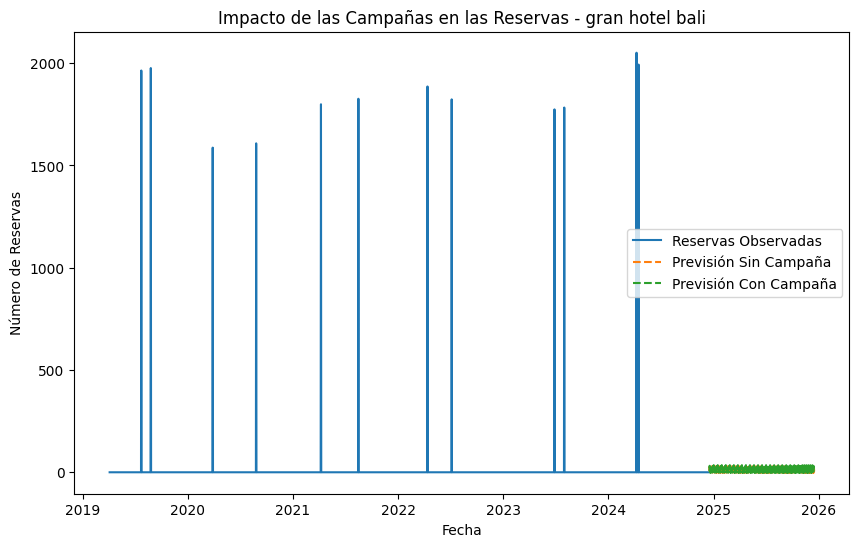

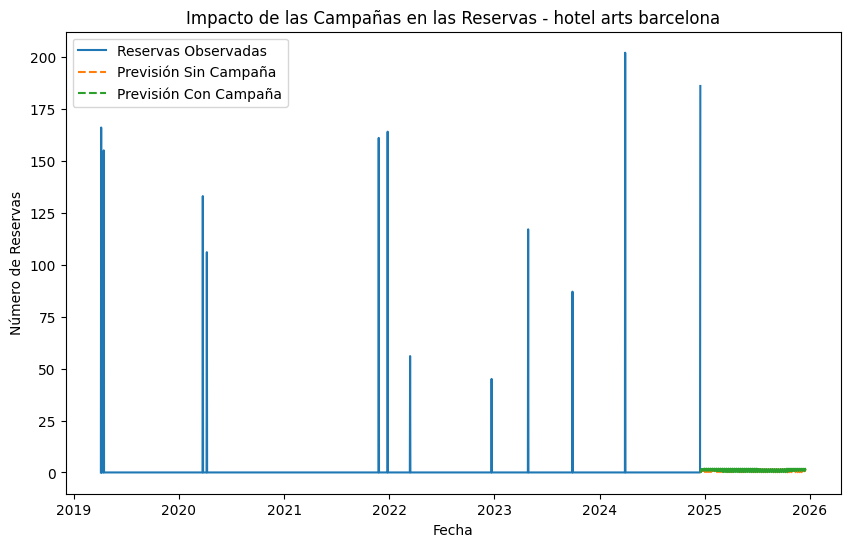

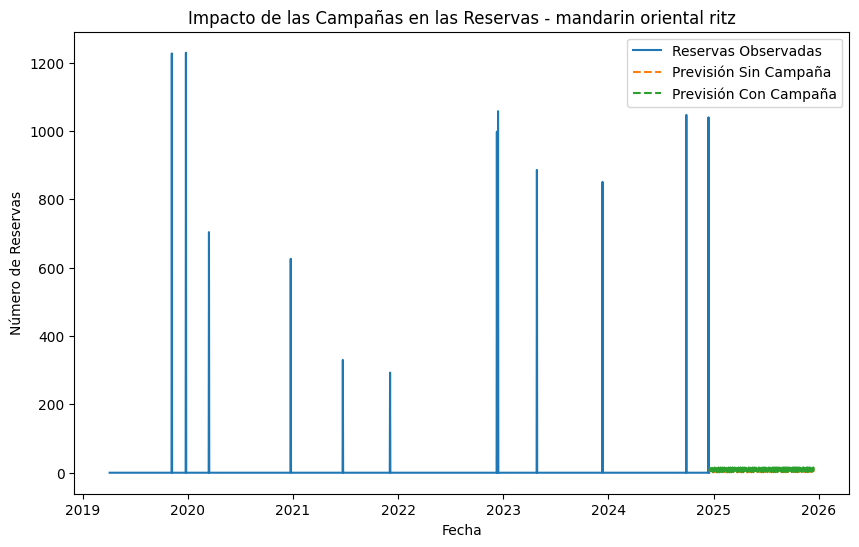

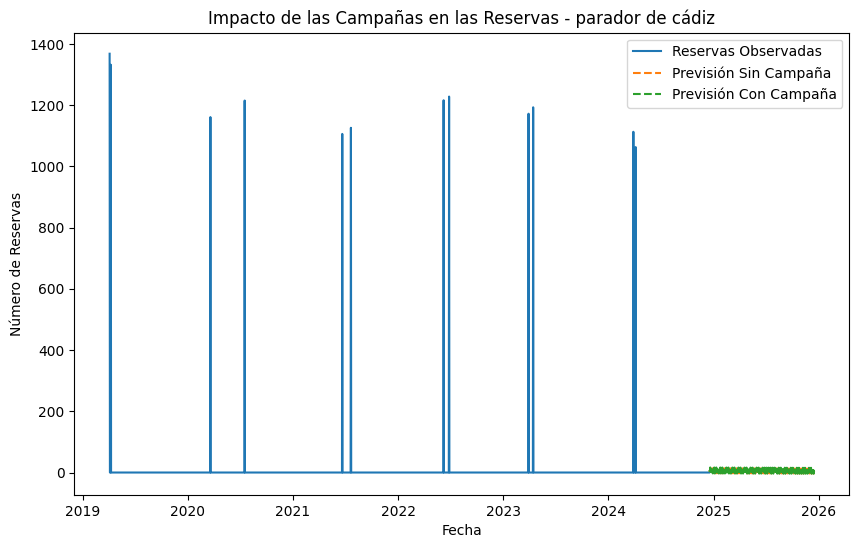

In [55]:
import matplotlib.pyplot as plt

for hotel in reservas_ts.columns:
    plt.figure(figsize=(10, 6))
    # Observadas
    plt.plot(reservas_ts.index, reservas_ts[hotel], label='Reservas Observadas')
    # Previsi칩n sin campa침a
    forecast_mean = sarima_results[hotel].get_forecast(steps=365).predicted_mean
    plt.plot(forecast_mean.index, forecast_mean, label='Previsi칩n Sin Campa침a', linestyle='--')
    # Previsi칩n con campa침a (ejemplo: +20%)
    reservas_con_campa침a = forecast_mean * 1.2
    plt.plot(forecast_mean.index, reservas_con_campa침a, label='Previsi칩n Con Campa침a', linestyle='--')
    plt.legend()
    plt.title(f'Impacto de las Campa침as en las Reservas - {hotel}')
    plt.xlabel('Fecha')
    plt.ylabel('N칰mero de Reservas')
    plt.show()

In [56]:
import pandas as pd

# Agrupar por hotel, a침o, mes y si hay campa침a
reservas_periodo = df.groupby(['hotel', 'a침o', 'mes', 'tiene_campa침a']).size().reset_index(name='reservas')

# Filtrar reservas con campa침a
reservas_con_campa침a = reservas_periodo[reservas_periodo['tiene_campa침a'] == 1]

# Filtrar reservas sin campa침a
reservas_sin_campa침a = reservas_periodo[reservas_periodo['tiene_campa침a'] == 0]


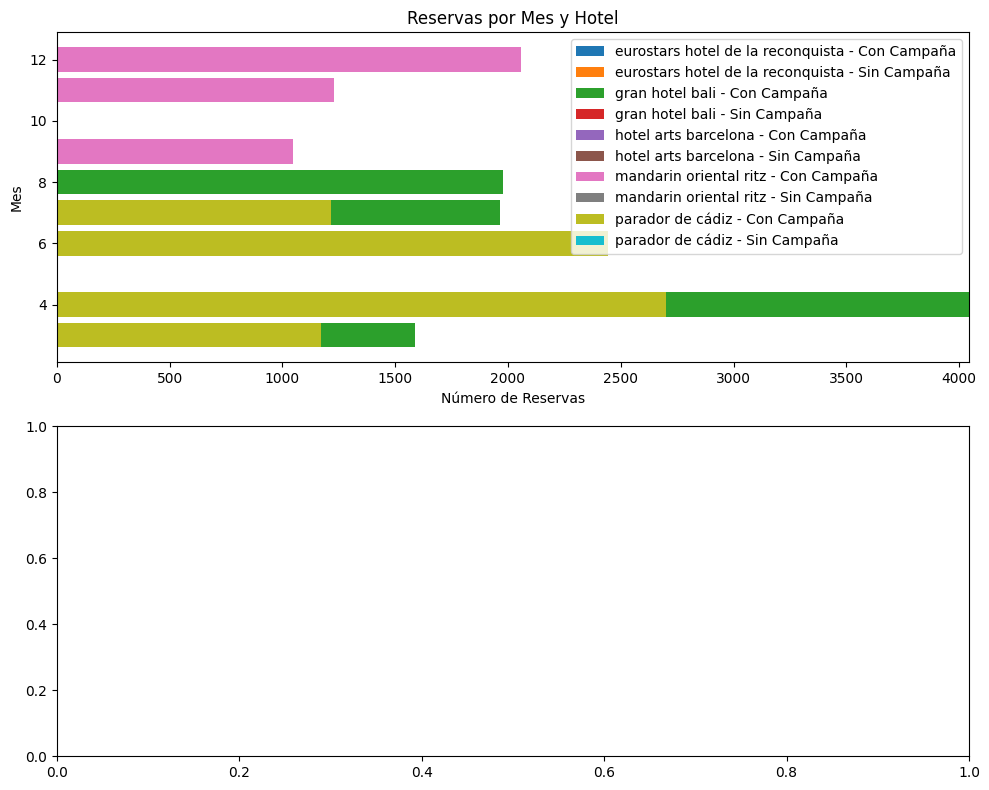

In [59]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subgr치ficos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Graficar reservas con campa침a por hotel
for hotel in reservas_con_campa침a['hotel'].unique():
    data_con = reservas_con_campa침a[reservas_con_campa침a['hotel'] == hotel]
    data_sin = reservas_sin_campa침a[reservas_sin_campa침a['hotel'] == hotel]
    
    # Unir los datos de reservas con y sin campa침a
    data = pd.merge(data_con, data_sin, on=['hotel', 'a침o', 'mes'], how='outer', suffixes=('_con', '_sin'))
    data.fillna(0, inplace=True)  # Reemplazar NaN por 0
    
    # Graficar las barras apiladas
    axes[0].barh(data['mes'], data['reservas_con'], label=f'{hotel} - Con Campa침a')
    axes[0].barh(data['mes'], data['reservas_sin'], left=data['reservas_con'], label=f'{hotel} - Sin Campa침a')

axes[0].set_title('Reservas por Mes y Hotel')
axes[0].set_xlabel('N칰mero de Reservas')
axes[0].set_ylabel('Mes')
axes[0].legend()

# Ajustar el dise침o y mostrar el gr치fico
plt.tight_layout()
plt.show()


In [63]:

# Pivotar los datos para tener columnas separadas para reservas con y sin campa침a
reservas_pivot = reservas_periodo.pivot_table(index=['hotel', 'a침o', 'mes'], columns='tiene_campa침a', values='reservas', aggfunc='sum', fill_value=0)

# Renombrar las columnas para mayor claridad, solo si existen ambas
column_map = {}
if 0 in reservas_pivot.columns:
	column_map[0] = 'Reservas_Sin_Campa침a'
if 1 in reservas_pivot.columns:
	column_map[1] = 'Reservas_Con_Campa침a'
reservas_pivot = reservas_pivot.rename(columns=column_map)

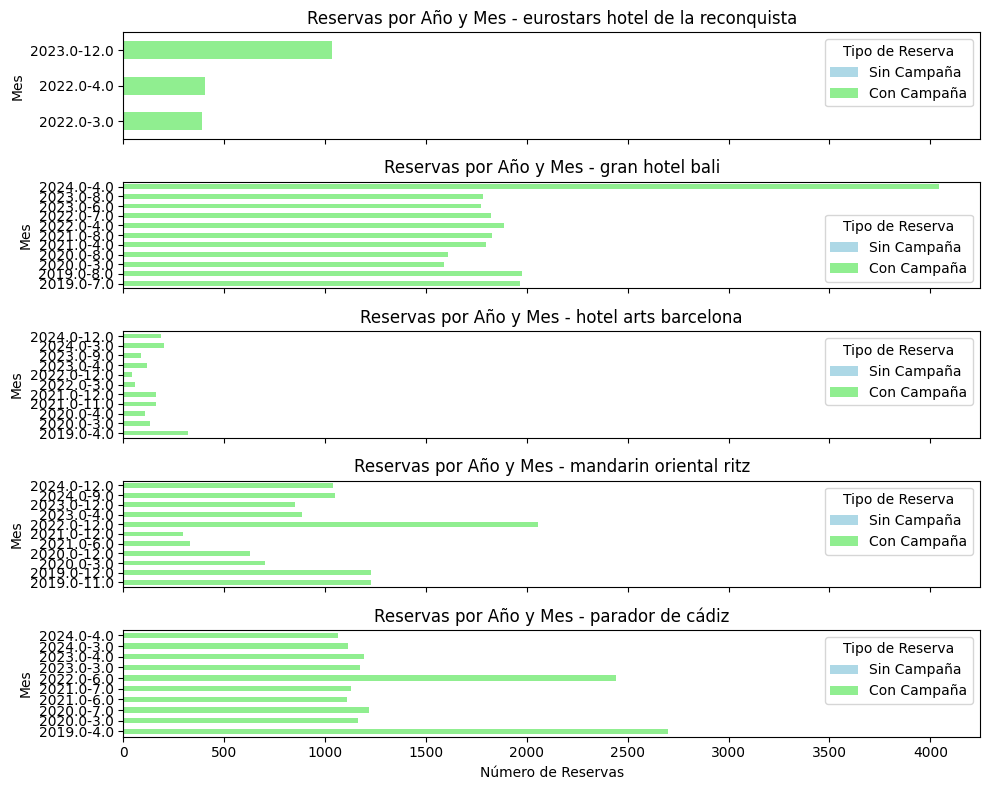

In [65]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subgr치ficos
fig, axes = plt.subplots(nrows=len(reservas_pivot.index.get_level_values('hotel').unique()), figsize=(10, 8), sharex=True)

# Si solo hay un hotel, axes no ser치 una lista, por lo que lo convertimos en lista
if len(reservas_pivot.index.get_level_values('hotel').unique()) == 1:
    axes = [axes]

# Graficar las barras apiladas por hotel
for i, hotel in enumerate(reservas_pivot.index.get_level_values('hotel').unique()):
    data_hotel = reservas_pivot.xs(hotel, level='hotel').copy()
    # Asegurarse de que ambas columnas existen
    if 'Reservas_Sin_Campa침a' not in data_hotel.columns:
        data_hotel['Reservas_Sin_Campa침a'] = 0
    if 'Reservas_Con_Campa침a' not in data_hotel.columns:
        data_hotel['Reservas_Con_Campa침a'] = 0
    data_hotel[['Reservas_Sin_Campa침a', 'Reservas_Con_Campa침a']].plot(kind='barh', stacked=True, ax=axes[i], color=['lightblue', 'lightgreen'])

    axes[i].set_title(f'Reservas por A침o y Mes - {hotel}')
    axes[i].set_xlabel('N칰mero de Reservas')
    axes[i].set_ylabel('Mes')
    axes[i].set_yticklabels([f'{mes}-{a침o}' for mes, a침o in data_hotel.index])
    axes[i].legend(title='Tipo de Reserva', labels=['Sin Campa침a', 'Con Campa침a'])

# Ajustar el dise침o y mostrar el gr치fico
plt.tight_layout()
plt.show()
